## Exploring the Binomial and Negative-Binomial Distributions
#### Lab 4 for MTHE 224, Fall 2023

#### The Binomial Distribution

As we have seen in class, the binomial distribution describes a random variable that is the result of $n$ independent Bernoulli trials. This means that when we add together the result of several experiments with possible outcomes 0 or 1, and count the number of 1s, the result follows a binomial distribution. Part of this lab will be spent testing the truth behind that statement. We can take samples from the binomial distribution by calling it from the `random` submodule of `numpy` as `binomial`.

The probability mass function (pmf) of the binomial distribution is given by
$$ P(x;n,p) = \binom{n}{x}p^x(1-p)^{n-x},$$
where $n$ is the total number of trials, $p$ is the probability of success of an individual trial, $N$ is the number of successes, and $\binom{n}{N}= \frac{n!}{N!(n-N)!}$ is the binomial coefficient (also called the "choose function").

#### Python Functions

When we have code we want to reuse often, it is helpful to save the code as a function. Functions are created using the sytax 
```
def function_name(arguments):
    code to compute value 
    ...
    return value 
```
You can chose almost anything for your function name, however there are some reserved keywords you cannot use, such as `range`. The arguments are a list of things you need to input to compute the desired value. The return value line at the end is important, because it tells your function what to output. Without it, your function will still go through all the computations, but will not tell you what the answer was. You can create any variables you need within the function, but they will only be defined within the scope of the function. This means that python will not recognize that you have defined these variables if you try to use them later. 

#### Exercises
1. Create a function to compute the factorial of a number. Test it by showing that $4! = 24$.  
2. Create a function to compute the binomial coefficient. Test it by showing that $\binom{4}{2} = 6$

In [55]:
def factorial(n):
    if n == 0: # Test if n = 0
        return 1 # if n = 0, then return 0! = 1
    else:   # If n =/= 0, then do this instead:
        fact = n # Define the initial value for the factorial
        for i in range(1,n): #range up to n does not include n
            fact = fact * i #multiply fact by all the values from 1 to n
        return fact # return the value fact 

factorial(4) # Should be 24

24

In [53]:
def binomial_coefficient(n,k):
    if (k>n)|(k<0): # The bar between the two conditions means "or" 
        return 0 # If k is negative or larger than n, return 0
    else: #if k is not negative, then do these things. 
        return factorial(n)//(factorial(n-k)*factorial(k)) # Definition of choose function

binomial_coefficient(4,2) # Should be 6

6

#### Exercises

1. Generate a vector of 1000 samples from a binomial distribution with $p = 0.2$ and $n = 12$. 
2. Plot a histogram of the frequency of each outcome.

(array([0.22688172, 0.29892473, 0.22903226, 0.16451613, 0.05913978,
        0.01612903, 0.00537634, 0.        , 0.        , 0.        ,
        0.        ]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <BarContainer object of 11 artists>)

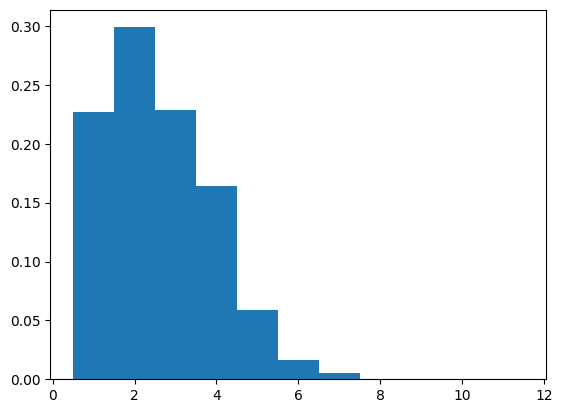

In [37]:
from matplotlib import pyplot as plt
import numpy as np 

samples = np.random.binomial(12,0.2,1000)
plt.hist(samples,bins = range(1,13),align="left",density ="frequency",)


#### The Negative Binomial Distribution

The negative-binomial distribution is a lot like the binomial distribution. To derive a binomial distribution from trials, we fixed a number $n$ beforehand and conducted that many experiments. To derive a negative-binomial distribution, we pick a number $r$ beforehand, and conduct experiments until we encounter $r$ successes. We can take samples from the negative-binomial distribution by calling it from the `random` submodule of `numpy` as `negative_binomial`. 

The probability mass function for the negative-binomial distribution is 
$$ P(x) = \binom{x+r-1}{r-1}(1-p)^xp^r$$
where $r$ is the number of successes before quitting, $p$ is the probability of success of an individual trial, $x$ is the number of failures encountered before quitting, and $\binom{n}{x}= \frac{n!}{x!(n-x)!}$ is the binomial coefficient. Note that some references will define the negative-binomial distribution by conducting experiments until a set amount of failures are reached. 

#### Exercises
1. Plot the pmf of the negative-binomial distribution with $r=3$ and $p=0.6$ for $x$ from $0$ to $16$
2. Generate a vector of 10,000 samples from a negative-binomial distribution with $r=3$ and $p = 0.6$
3. Plot a histogram of the frequency of each outcome

(array([2.203e-01, 2.506e-01, 2.099e-01, 1.449e-01, 8.130e-02, 4.570e-02,
        2.410e-02, 1.120e-02, 6.100e-03, 2.800e-03, 2.100e-03, 7.000e-04,
        2.000e-04, 1.000e-04, 0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <BarContainer object of 16 artists>)

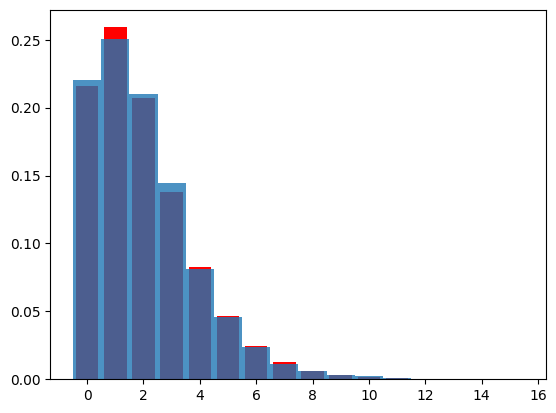

In [47]:
def neg_binom_pmf(x,r,p): # function to calculate the negative binomial pmf
    return binomial_coefficient(x+r-1,r-1)*(1-p)**x*p**r

x_vals = range(16) # x values to plot
y = [neg_binom_pmf(j,3,0.6) for j in x_vals] #creates an array of y-values using the binomial pmf and x-values
plt.bar(x_vals,y,color="red") #use a bar-chart for the pmf 

samples_negative_binomial = np.random.negative_binomial(3,0.6,10000)
## Plot the samples as a histogram.
#  The alpha option makes the bars a litle bit transparent. 
#  The density option scales histogram so that the box heights sum to 1
#  The align option centers the bars over the number values
plt.hist(samples_negative_binomial,bins=range(0,17),density="frequency",align="left", alpha = 0.8)

## Tasks

For some of the following tasks, you may want to copy the factorial and binomial_coefficient functions from the lab description

<b>Task 1</b><br>
Create a function to generate a Bernoulli random variable with probability $p$. 
Test you function by running 20 Bernoulli trials with probability of success $p= 0.2$. 

<b> Task 2 </b><br>
Create a function that calculates the sum of 20 Bernoulli trials with $p = 0.2$. Run this function 10,000 times and save the results as a vector called <code>maybe_binomial</code>.

<b> Task 3 </b><br>
Plot a histogram of the frequency of outcomes in <code>maybe_binomial</code>. On the same axes, plot the pmf for the binomial distribution with $n=20$ and $p = 0.2$. 

<b> Task 4 </b><br>
Create a function that runs Bernoulli trials with $p=0.6$ until 5 successes are reached, and returns the total number of failures that occured. Run this function 10,000 times and save the results in a vector called <code> maybe_negative_binomial</code><br>

<b> Task 5 </b>
Plot a histogram of the frequency of each outcome in <code>maybe_negative_binomial</code>. On the same axes, make a bar chart for the pmf for the negative binomial distribution with $r=5$ and $p=0.6$ for $x$ between 0 and 45.<br>

0